In [1]:
import json
import pandas as pd 
import datetime
import numpy as np
from pycountry_convert import convert_country_alpha2_to_continent
from data_handling import utc_convert
import matplotlib.dates as mdates
import scipy

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

pd.options.display.max_colwidth = 201

In [2]:
# CLustering
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

# Prep data

In [4]:
from marvin_data_prep import load_data, prepare_data, separate_os

In [5]:
#data mining
from marvin_auxiliary_functions import timestamp_array, make_screen_vector,  \
                                        extract_interaction_sequence_selected_screen, plot_screen_period, in_list, \
                                        count_screen_in_sessions_data, interaction_time_coor_array_selected_screen
from marvin_algorithms import dynamic_time_warp, condensed_matrix, distance_matrix, cross_distance_matrix, levenshtein
from useful_lists import important_screens, LIST_OF_SCREENS, ios_screens, gesture_list_ios

In [6]:
df = load_data('anonymisedapp', 80)
df = prepare_data(df, 'anonymisedapp')
df = separate_os(df)
print(len(df))

8615


In [8]:
df.heatmap_timeline[1]

[{'an': 'UploadViewController',
  'at': 0,
  'cor': [[-999, -999, 1, 10, 1, 0.57535099983215, []],
   [96,
    622,
    1,
    11,
    1,
    0.5772830247879,
    [[1, 0.57728797197342, 96, 622],
     [2, 0.59333444145159, 100, 620.5],
     [2, 0.60992094146786, 102, 620.5],
     [2, 0.62658406645642, 104, 621],
     [2, 0.64329598311451, 105.5, 625.5],
     [3, 0.65976331644924, 107.5, 632.5]]],
   [96, 622, 1, 0, 1, 0.65069699287415, []]],
  'ref': 'Launch',
  'vt': 1.1993860006332,
  'wb': False},
 {'an': 'PhotoStreamViewController',
  'at': 1.1993860006332,
  'cor': [[354.5,
    38.5,
    1,
    11,
    1,
    1.4530860185623,
    [[1, 1.4530910253525, 354.5, 38.5],
     [2, 1.4698099352245, 354.5, 38.5],
     [2, 1.5031310602208, 354.5, 38.5],
     [2, 1.5197960602236, 354.5, 38.5],
     [3, 1.5349310602469, 354.5, 38.5]]],
   [354.5, 38.5, 1, 0, 1, 1.5336319804192, []],
   [323.5, 299.5, 1, 3, 1, 3.4757409691811, []],
   [323.5,
    299.5,
    1,
    11,
    1,
    3.335969984531

In [23]:
df.interaction_information[8]

[{'_screen': 'MenuController',
  'interaction_coors': array([[-999. , -999. , -999. , -999. ],
         [ 325.5,  611. ,  325.5,  611. ],
         [ 325.5,  611. ,  325.5,  611. ]]),
  'interaction_count': 3,
  'interaction_labels': ['orientation_change_ios', 'trail', 'single_tap'],
  'interaction_times': array([ 0.57112503,  0.57530701,  0.65489203]),
  'orientations': array([ 1.,  1.,  1.]),
  'start_time': 0,
  'view_time': 1.5261160135269},
 {'_screen': 'UploadViewController',
  'interaction_coors': array([[-999. , -999. , -999. , -999. ],
         [ 224.5,  521.5,  247.5,  369. ],
         [  40.5,  429.5,   40.5,  429.5],
         [  40.5,  429.5,   40.5,  429.5],
         [ 158.5,  435.5,  158.5,  435.5],
         [ 158.5,  435.5,  158.5,  435.5],
         [ 319.5,  622. ,  319.5,  622. ],
         [ 319.5,  622. ,  319.5,  622. ],
         [ 310. ,  625.5,  310. ,  625.5],
         [ 310. ,  625.5,  310. ,  625.5]]),
  'interaction_count': 10,
  'interaction_labels': ['orientat

In [7]:
interaction_time_coor_array_selected_screen(df.iloc[7,:], selected_screens = ios_screens, df_mode=False)

{0: [],
 1: [],
 2: [(array([4, 1, 0, 2, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1]),
   array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.]),
   array([ 4.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.]))],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [(array([16, 10,  2,  0,  4,  8,  2,  0,  2,  0,  0,  0,  2,  2]),
   array([ 8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  8.]),
   array([ 16.,   2.,   0.,   6.,   8.,   0.,   0.,   0.,   0.,   4.,   4.,
            4.,   0.,   4.]))],
 8: [],
 9: [],
 10: [],
 11: [(array([4, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0]),
   array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
   array([ 4.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  2.]))],
 12: [],
 13: [],
 14: [(array([3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]),
   array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
   array([ 3.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.])),
  (array([11,  0, 

In [109]:
df['latest_interaction'] = df['interaction_information'].apply(find_latest_interaction)

In [110]:
df.sort_values(by='latest_interaction',ascending=False)['latest_interaction'].head(15)

5655    4734.473617
3856    4017.663498
6001    1870.565667
6463    1642.022740
5535     959.046361
9532     905.045834
9311     807.364624
2667     667.475481
4889     532.331429
5900     487.697451
5916     478.036524
510      471.432395
3002     468.279218
5310     450.342132
2366     447.678594
Name: latest_interaction, dtype: float64

In [16]:
len(df[df.screen_number <= 3])

3118

### A) interaction over screens histogram vector

In [ ]:
from useful_lists import LIST_OF_SCREENS, full_set_of_screens, ios_useful_screens

In [32]:
make_screen_vector(df['interaction_information'][19], 'interaction', ios_useful_screens)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,  18.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,  35.])

In [63]:
count_screen_in_sessions_data(df, ios_useful_screens, top=10)

EventPageViewController appears in 29.3% of sessions
CreateProfileModalViewController appears in 17.0% of sessions
UploadViewController appears in 16.6% of sessions
PhotoStreamViewController appears in 15.9% of sessions
GuestsViewController appears in 15.7% of sessions
InvitationViewController appears in 15.4% of sessions
PurchaseViewController appears in 14.5% of sessions
CreateWeddingViewController appears in 12.3% of sessions
ProfileViewController appears in 9.8% of sessions
ProfileSettingsViewController appears in 7.7% of sessions


### B) view time over screens histogram vector

In [7]:
make_screen_vector(df['interaction_information'][19], 'time', LIST_OF_SCREENS)

array([   0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
          0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
          0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
          0.      ,  100.844154,    0.      ,    0.      ,    0.      ,
          0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
          0.      ,    0.      ,    8.155846,    0.      ,    0.      ,
          0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
          0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
          0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
          0.      ,    0.      ,    0.      ,    0.      ])

### C) screen visits over time histogram vector

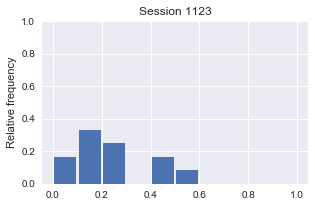

In [7]:
plot_histogram(df,1123,1123, type='screen', max=5, relative=True, bins='even')

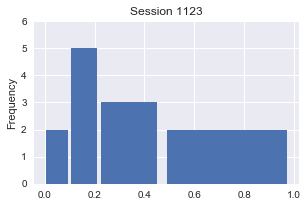

In [8]:
plot_histogram(df,1123,1123, type='screen', max=6, bins='log')

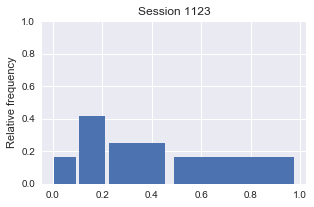

In [9]:
plot_histogram(df,1123,1123, type='screen', max=6, relative=True,bins='log')

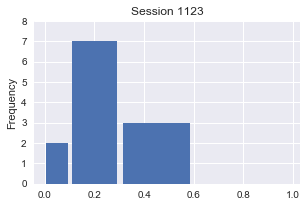

In [10]:
plot_histogram(df,1123,1123, type='screen', max=8, bins=[0,0.1,0.3,0.6,1])

### D) interactions over time histogram vector

In [75]:
diff = np.diff(timestamp_array(df['interaction_information'][3587],'interaction'))

In [78]:
from scipy import stats
stats.describe(diff)

DescribeResult(nobs=241, minmax=(0.0052710175513999147, 101.64641898870002), mean=3.5738247138335963, variance=118.94241266799548, skewness=6.227127699829843, kurtosis=45.03505129537112)

In [93]:
x = np.linspace(0,1000,30)
y = [len(np.where(arr3587 < _x)[0])/float(len(arr3587)) for _x in x]

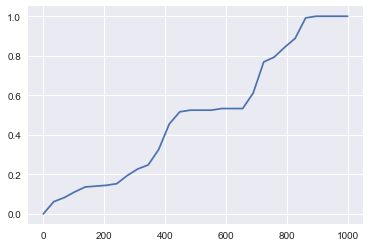

In [95]:
plt.plot(x, y)

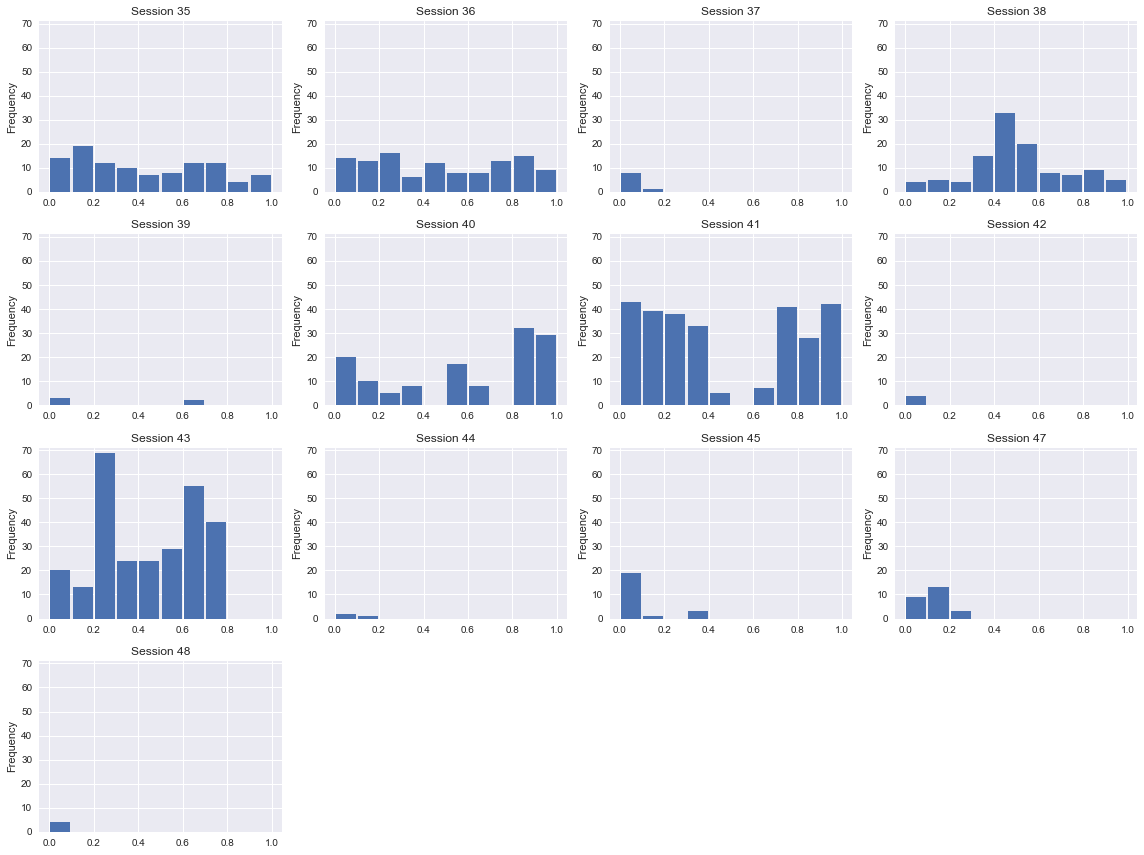

In [12]:
plot_histogram(df,35,48,max=71,type='interaction')

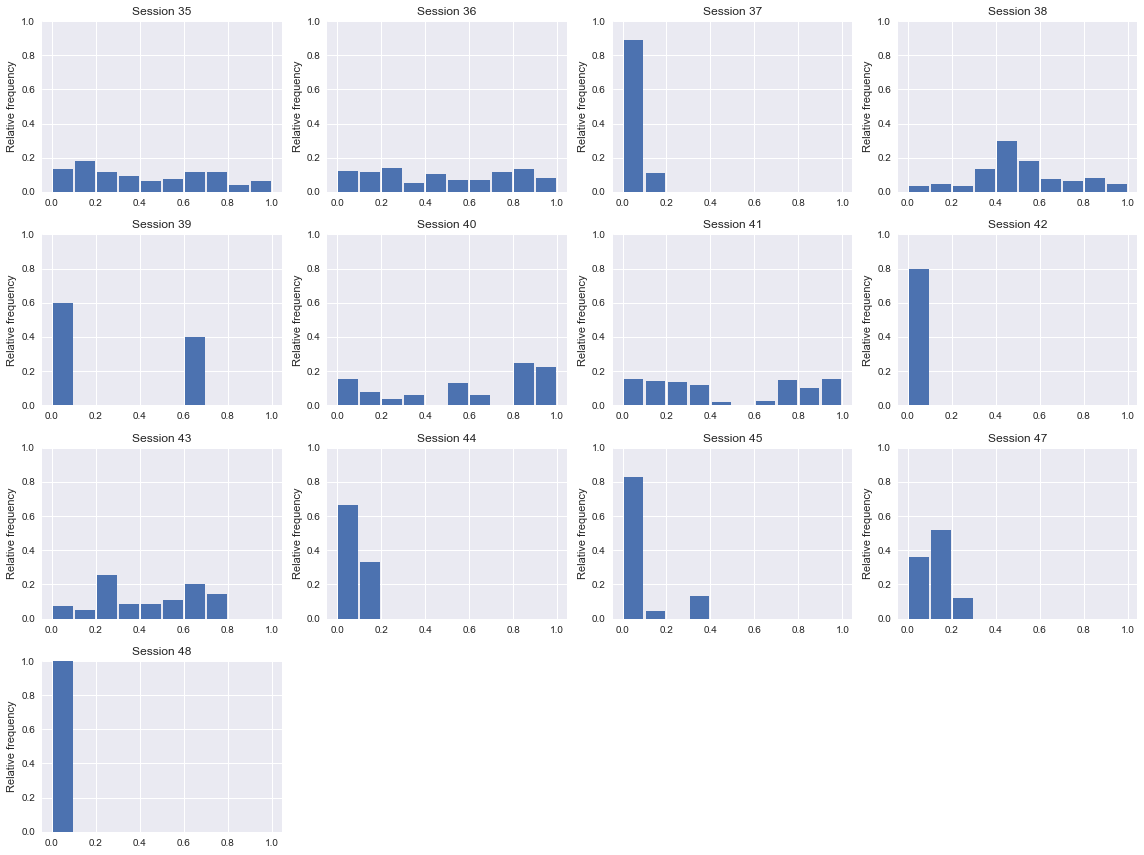

In [13]:
plot_histogram(df,35,48,max=71,type='interaction', relative=True)

### E) interactions over time for individual screen histogram vector

Testing distribution of difference of time array on 1 screen:

In [120]:
stats.describe(np.diff(inter_arr_ex))

DescribeResult(nobs=297, minmax=(0.78117996999992556, 13.748422030000029), mean=2.2335510741750841, variance=2.2942365834766432, skewness=3.9844091872292617, kurtosis=21.01843286645561)

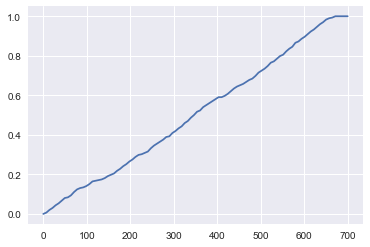

In [122]:
x = np.linspace(0,700,100)
y = [len(np.where(inter_arr_ex < _x)[0])/float(len(inter_arr_ex)) for _x in x]
plt.plot(x,y)

# Extract data from selected screens

## Choosing Vector quantization method

In [7]:
X, y = interaction_dataframe_selected_screen(df.head(500)) # histogram data with unequal bins
X_t = StandardScaler().fit_transform(X)

In [8]:
y # Here the correct labels - different screens

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2,

In [21]:
a = interaction_array_selected_screen(df.head(5)) # raw timestamp data
a

{0: [[array([  0.25370002,   0.33424598,   2.13658398,   2.868981  ,
            4.04858398,   6.20002598,   6.976789  ,   7.89287698,
            9.00993699,   9.948874  ,  11.61107099,  13.83712602,
           14.93638897,  15.50313997,  16.98557597,  17.53626102,
           18.13627201,  20.223993  ,  21.40409702,  42.236956  ,
           42.302908  ,  43.82079798,  43.869578  ]), 44.405759990215],
  [array([ 1.24593097,  1.34532797,  4.76303595,  4.81205601]),
   4.8406879901886],
  [array([ 10.37869996,  11.31311899,  11.37847799,  11.54643899,
           12.42929   ,  13.44877297,  14.54609299,  15.63138199,
           18.79700297,  19.87969297,  19.92924696,  20.52990299,
           20.64572799,  21.28040498,  21.36272097,  22.28033197,
           23.04716694,  23.76337296,  24.68068099,  25.26407695,
           26.08008695,  27.295506  ,  27.98065895,  28.89725995,
           29.59693199,  31.44668996,  31.76381898,  32.08396494,
           32.11409599,  32.12838495,  32.414698

In [17]:
b = interaction_array_selected_screen_uneven(df.head(50))
b

{0: [array([2, 0, 2, 0, 1, 0, 2, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0], dtype=int32),
  array([0, 2, 0, 0, 2], dtype=int32),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 1,
         2, 1, 1, 1, 2, 1, 1, 0, 2, 5, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0], dtype=int32),
  array([3, 1, 1, 2, 4, 2, 2, 1, 2, 1, 2, 2, 3, 3, 2, 2, 0, 2, 1, 2, 0, 2, 2,
         0, 1, 1, 2, 1, 1, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0,
         2, 0], dtype=int32),
  array([2, 2, 0], dtype=int32),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

# Dynamic Time Warping

In [7]:
dynamic_time_warp([0,0,0,0,1,0],[0,0,1,0,0,0], print_mat=True, print_path=True)[0]

[[ 0.  0.  1.  1.  1.  1.]
 [ 0.  0.  1.  1.  1.  1.]
 [ 0.  0.  1.  1.  1.  1.]
 [ 0.  0.  1.  1.  1.  1.]
 [ 1.  1.  0.  1.  2.  2.]
 [ 1.  1.  1.  0.  0.  0.]]
[(5, 5), (5, 4), (5, 3), (4, 2), (3, 1), (2, 0), (1, 0), (0, 0)]


0.0

In [56]:
dynamic_time_warp(np.array([0,0,2,0,2,3,0,0,1,0])/8.,np.array([1,2,1,0,0,0,1,2,0])/7., normalization='none')[0]

0.2977380714380905

In [61]:
dynamic_time_warp(np.array([1,2,0,1])/4.,np.array([0,0,2,0,2,3,0,0,1,0])/8., normalization='none')[0]

0.5303300858899106

In [60]:
dynamic_time_warp(np.array([1,2,0,1])/4.,np.array([0,2,0,1,2])/5., normalization='none')[0]

0.31224989991991992

In [18]:
dynamic_time_warp([0,1,0,1,0,0,0,0,1,0,0,0,0],[0,1,2,3,1,3,2,0,1,0,1],normalization='short',print_mat=True, print_path=True)[0]

[[  0.   1.   5.  14.  15.  24.  28.  28.  29.  29.  30.]
 [  1.   0.   1.   5.   5.   9.  10.  11.  11.  12.  12.]
 [  1.   1.   4.  10.   6.  14.  13.  10.  11.  11.  12.]
 [  2.   1.   2.   6.   6.  10.  11.  11.  10.  11.  11.]
 [  2.   2.   5.  11.   7.  15.  14.  11.  11.  10.  11.]
 [  2.   3.   6.  14.   8.  16.  18.  11.  12.  10.  11.]
 [  2.   3.   7.  15.   9.  17.  20.  11.  12.  10.  11.]
 [  2.   3.   7.  16.  10.  18.  21.  11.  12.  10.  11.]
 [  3.   2.   3.   7.   7.  11.  12.  12.  11.  11.  10.]
 [  3.   3.   6.  12.   8.  16.  15.  12.  12.  11.  11.]
 [  3.   4.   7.  15.   9.  17.  19.  12.  13.  11.  12.]
 [  3.   4.   8.  16.  10.  18.  21.  12.  13.  11.  12.]
 [  3.   4.   8.  17.  11.  19.  22.  12.  13.  11.  12.]]
[(12, 10), (11, 9), (10, 9), (9, 9), (8, 8), (7, 7), (6, 7), (5, 7), (4, 7), (3, 6), (3, 5), (2, 4), (1, 3), (1, 2), (1, 1), (0, 0)]


0.31491832864888675

# Clustering with DTW

In [3]:
data_test = [np.array([1,2,3,0,0,0,0,0,1,2,1,1]), #0
             np.array([2,1,0,0,2,0]),             #1
             np.array([1,1,0,1,0,0,0,0]),         #2
             np.array([3,4,2,1,0,0,0,0,2,1,0]),   #3
             np.array([0,0,2,1,0,0,2]),           #4
             np.array([3,4,0,1]),                 #5
             np.array([0,0,2,2,0,0,0,0,1]),       #6
             np.array([1,1,1]),                   #7
             np.array([1,2,2])                    #8
            ]

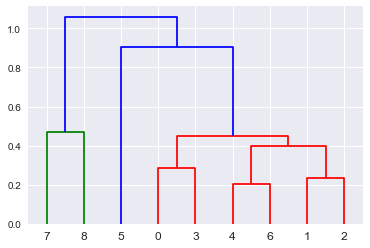

In [7]:
condense = condensed_matrix(data_test, normalization='short')
link_test = linkage(condense, 'average')
dendrogram(link_test)
plt.show()

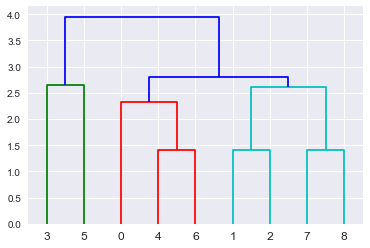

In [8]:
condense = condensed_matrix(data_test, normalization='none')
link_test = linkage(condense, 'average')
dendrogram(link_test)
plt.show()

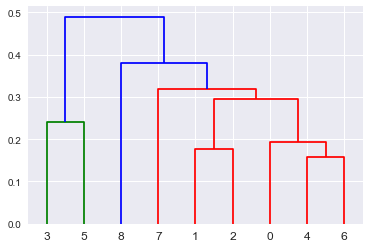

In [9]:
condense = condensed_matrix(data_test, normalization='long')
link_test = linkage(condense, 'average')
dendrogram(link_test)
plt.show()

In [158]:
data_real = []
for i in range(4):
    if len(b[i]) > 0:
        for ele in b[i]:
            data_real.append(ele)
len(data_real)

90

In [188]:
condense = condensed_matrix(data_real)
link_avg = linkage(condense, 'average')

In [15]:
cophenet(link_avg, condensed_matrix(data_real, dist='dtw'))[0]

0.72313522670281671

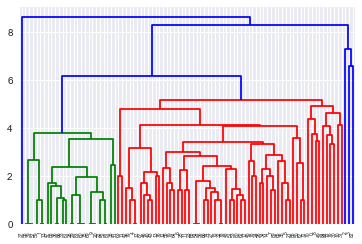

In [189]:
dendrogram(link_avg)
plt.show()

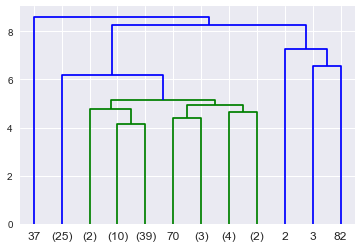

In [190]:
dendrogram(link_avg, truncate_mode='lastp', p=12)
plt.show()

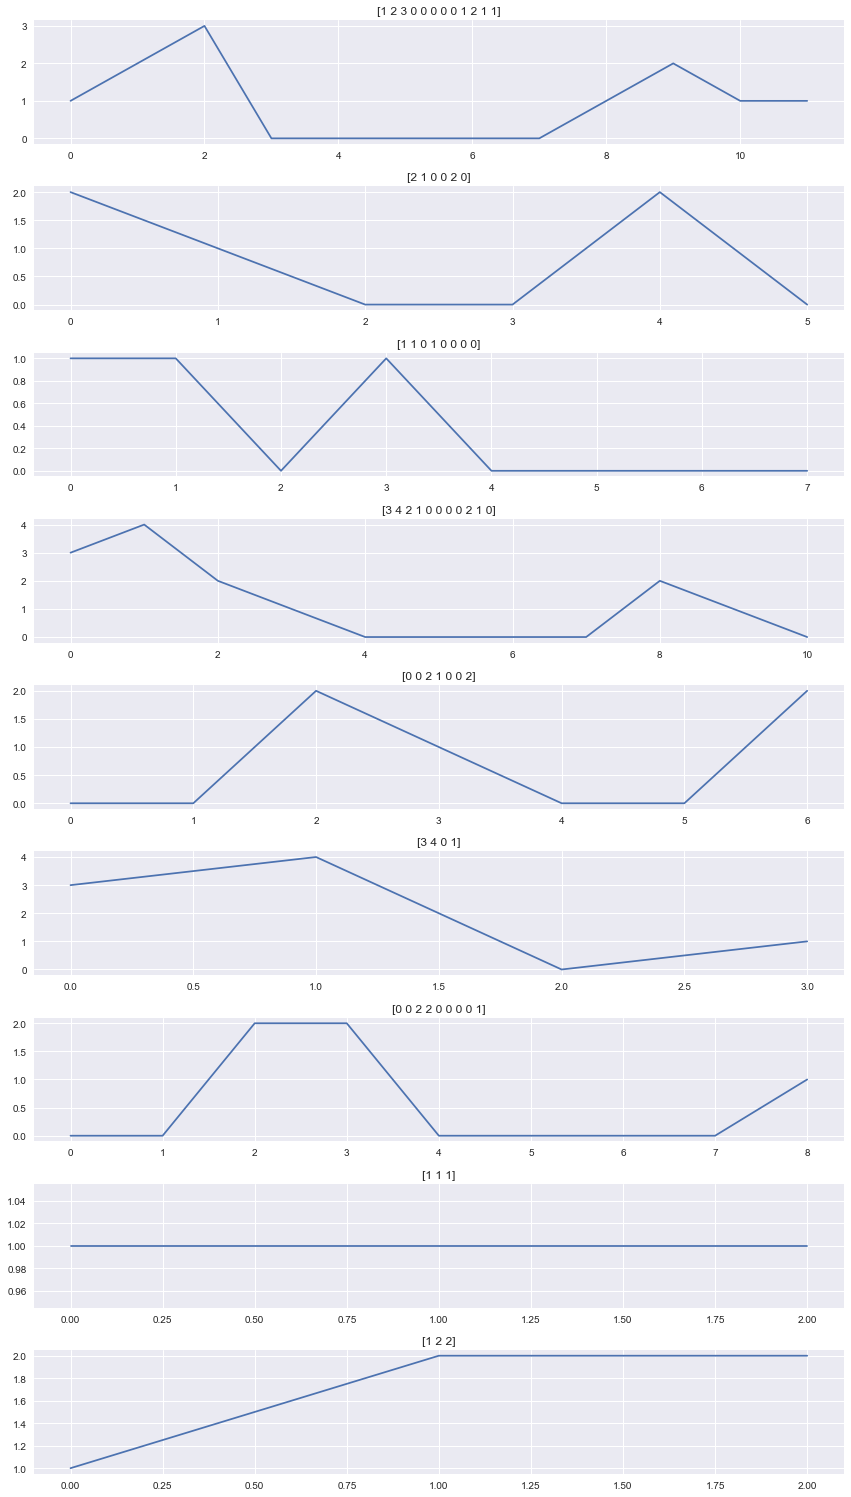

In [213]:
fig=plt.figure(figsize = [12, 23])
for i in range(0, len(data_test)):
    ax = fig.add_subplot(10,1,i+1)
    ax.set_title(str(data_test[i]))
    ax.plot(data_test[i])
plt.tight_layout()

In [191]:
link_single = linkage(condensed_matrix(data_real), 'single')

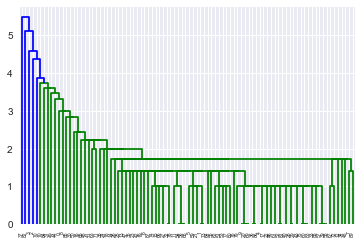

In [192]:
dendrogram(link_single)
plt.show()

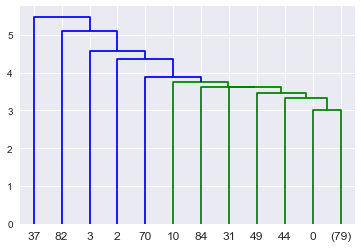

In [193]:
dendrogram(link_single, truncate_mode='lastp', p=12)
plt.show()

# Running DBSCAN

In [194]:
dist_mat = distance_matrix(data_real)

In [203]:
db = DBSCAN(eps=1, min_samples=4, metric='precomputed')

In [207]:
db.fit_predict(dist_mat)

array([-1,  0, -1, -1,  1,  0, -1, -1, -1,  1, -1,  4, -1, -1, -1,  2, -1,
        1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  2,  1,  1, -1, -1,  2,  1,
       -1, -1,  1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1,
       -1,  1,  3,  4, -1,  4,  1,  1,  0,  1,  1,  3, -1, -1, -1,  2, -1,
        4,  1, -1, -1, -1,  0,  2,  1, -1,  3,  2,  1,  3,  1, -1,  1, -1,
       -1,  1, -1,  1, -1], dtype=int32)

In [210]:
res = db.fit_predict(dist_mat)
n_clusters_ = len(set(res)) - (1 if -1 in res else 0)
print('Number of clusters:', n_clusters_)
unique, counts = np.unique(res, return_counts=True)
print('Distribution:' + '\n',np.asarray((unique, counts)).T)

Number of clusters: 5
Distribution:
 [[-1 47]
 [ 0  4]
 [ 1 25]
 [ 2  6]
 [ 3  4]
 [ 4  4]]


# K-means

In [29]:
from sklearn.cluster import KMeans

In [31]:
km = KMeans(n_clusters=4)
km.fit(X_t)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:
km.labels_

array([2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0,
       0, 1,

# Long bins (equal 2s bins to 700) and PCA

In [35]:
X2, y2 = interaction_dataframe_selected_screen(df.head(500),bins=np.linspace(0,700,350)) # histogram with equal bins
X2_t = StandardScaler().fit_transform(X2)

In [36]:
X2.shape

(521, 349)

In [39]:
pca = PCA()
pca.fit(X2_t)

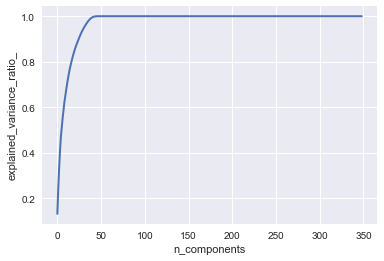

In [47]:
plt.clf()
plt.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=2)
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [50]:
pca = PCA(n_components=40)
X2_pca = pca.fit_transform(X2_t)

In [51]:
X2_pca.shape

(521, 40)

In [52]:
db = DBSCAN(eps=0.1, min_samples=8).fit_predict(X2_pca)

In [53]:
db

array([-1, -1, -1, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        0, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  3, -1, -1, -1,  2, -1, -1,  0, -1, -1, -1, -1,
       -1,  0, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  4, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0, -1, -1, -1, -1, -1,  4, -1,  4, -1,  2,  3, -1,  4,  3,
        4, -1,  0, -1, -1, -1,  3, -1, -1, -1,  1,  1, -1,  4,  3,  3, -1,
       -1, -1, -1, -1, -1, -1,  4,  0, -1, -1, -1,  3,  0,  1, -1, -1, -1,
       -1, -1,  4, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        4, -1, -1, -1, -1, -1,  2, -1,  3,  2, -1, -1,  4,  0,  0, -1, -1,
        2, -1,  4, -1,  4, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1,  3, -1, -1,  3, -1,
        3, -1, -1, -1,  3, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [54]:
n_clusters_ = len(set(db)) - (1 if -1 in db else 0)
print('Number of clusters:', n_clusters_)
unique, counts = np.unique(db, return_counts=True)
print('Distribution:' + '\n',np.asarray((unique, counts)).T)

Number of clusters: 5
Distribution:
 [[ -1 419]
 [  0  22]
 [  1  10]
 [  2  11]
 [  3  39]
 [  4  20]]


### F) Normalization and Regularization

# TESTING LARGER DATASET DIVIDED INTO SCREENS

In [52]:
df_seq = extract_interaction_sequence_selected_screen(df, selected_screens=ios_screens, print_err=False)
df_seq['hist_length'] = df_seq.interaction_hist.apply(len)
df_seq['interaction_number'] = df_seq.interaction_hist.apply(sum)
len(df_seq)

35572

In [53]:
df_seq.head(7)

,session_id,user_id,time,screen,interaction_hist,interaction_label,interaction_coors_binned,hist_length,interaction_number
0,588f6d9cc4b502ffffb26f48,6c705f66cbf05fe658f46f286aea07f5,2017-01-30 16:47:13,CouponModalViewController,"[4, 2, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0]","[2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0]","[4.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0]",14,12
1,588f6d9cc4b502ffffb26f48,6c705f66cbf05fe658f46f286aea07f5,2017-01-30 16:47:13,PhotoStreamViewController,"[23, 10, 9, 0, 4, 5, 4, 3, 5, 2, 0, 0, 0, 4]","[3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0]","[40.0, 4.0, 15.0, 0.0, 21.0, 2.0, 0.0, 3.0, 2.0, 3.0, 20.0, 0.0, 0.0, 10.0]",14,69
2,588f6d9cc4b502ffffb26f48,6c705f66cbf05fe658f46f286aea07f5,2017-01-30 16:47:13,PurchaseViewController,"[2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]","[2.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0]",14,6
3,588f6d9cc4b502ffffb26f48,6c705f66cbf05fe658f46f286aea07f5,2017-01-30 16:47:13,UploadViewController,"[3, 0, 2, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]","[4.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0]",14,9
4,588f6e26ff6059ffff8b4595,6c705f66cbf05fe658f46f286aea07f5,2017-01-30 16:49:31,EventPageViewController,"[10, 1, 2, 0, 7, 1, 0, 1, 0, 1, 0, 0, 3, 4]","[3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0]","[14.0, 3.0, 3.0, 3.0, 5.0, 2.0, 0.0, 2.0, 1.0, 3.0, 2.0, 1.0, 1.0, 2.0]",14,30
5,588f6e26ff6059ffff8b4595,6c705f66cbf05fe658f46f286aea07f5,2017-01-30 16:49:31,EventPageViewController,"[3, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0]","[4.0, 0.0, 1.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 1.0]",14,9
6,588f6e26ff6059ffff8b4595,6c705f66cbf05fe658f46f286aea07f5,2017-01-30 16:49:31,PhotoStreamViewController,"[4, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2]","[2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0]","[4.0, 4.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",14,12


In [ ]:
df_seq['interaction_vector'] = df_seq.apply(build_overall_vector, axis=1)

In [85]:
df_test

,array1,array2,array3,interaction_vector
1,"[0, 1, 2]","[2, 3, 4]",4,"[0, 1, 2, 2, 3, 4]"
2,"[3, 5, 7]","[2, 4, 6]",8,"[3, 5, 7, 2, 4, 6]"


In [81]:
for index, row in df_test.iterrows():
    print(type(row.array1))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [84]:
def build_overall_vector(row):
    hist_arr = row.array1.tolist()
    label_arr = row.array2.tolist()
    #bin_arr = row.interaction_coors_binned.values[0]
    return hist_arr+label_arr

df_test['interaction_vector'] = df_test.apply(build_overall_vector, axis=1)

In [19]:
print(len(df_seq[df_seq.hist_length >= 200]))
len(df_seq[df_seq.hist_length >= 200])/len(df)

127


0.02287463976945245

In [8]:
# Remove short and long sequence
df_seq = df_seq[(df_seq.hist_length > 1) & (df_seq.hist_length < 200) & (df_seq.interaction_number > 1)]
# Period < 3 second is likely to be user mistake, and not worth considering
len(df_seq)

21987

In [9]:
# extra calculations
df_seq['interaction_hist_normalized'] = df_seq['interaction_hist'] / df_seq['interaction_number']
df_seq['trail_number'] = df_seq['interaction_label'].apply(in_list, list_of_items = ['trail','swipe_up','swipe_down',
                                                                                     'swipe_right','swipe_left'])
df_seq['tap_number'] = df_seq['interaction_label'].apply(in_list, list_of_items = ['single_tap','double_tap'])
df_seq['trail/tap ratio'] = df_seq['trail_number'] / df_seq['tap_number']
df_seq['interaction/length ratio'] = df_seq['interaction_number'] / df_seq['hist_length']

In [30]:
df_seq.hist_length.describe()

count    21987.000000
mean        14.131259
std         20.829463
min          2.000000
25%          4.000000
50%          7.000000
75%         15.000000
max        197.000000
Name: hist_length, dtype: float64

In [54]:
df_seq.interaction_number.describe()

count    35572.000000
mean        18.815754
std         30.983437
min          1.000000
25%          6.000000
50%          9.000000
75%         21.000000
max       1008.000000
Name: interaction_number, dtype: float64

In [28]:
df_seq[df_seq.hist_length == 2].screen.value_counts()

GuestsViewController                643
ProfileViewController               404
EventPageViewController             347
ProfileSettingsViewController       265
ViewController                      212
MenuController                      192
UploadViewController                168
InvitationViewController            128
PhotoStreamViewController           112
EditViewController                  110
PersonalInfoViewController           77
UploadQueueTableViewController       66
CreateProfileModalViewController     36
TimeScheduleViewController           35
PurchaseViewController               28
CreateWeddingViewController          22
AboutViewController                  20
CouponModalViewController            16
CameraViewController                 14
AdminViewController                   9
CreateProfileEmailViewController      7
SupportViewController                 6
CommentViewController                 6
RateViewController                    5
DownloadViewController                4


In [55]:
df_seq.screen.value_counts().sort_values(ascending=False).head(6)

EventPageViewController      5882
MenuController               5611
GuestsViewController         2894
ViewController               2464
UploadViewController         2280
PhotoStreamViewController    2014
Name: screen, dtype: int64

In [58]:
# People visisted these screens the most

In [56]:
df_seq.user_id.value_counts().head(4)

6b574dc85705b2317e10146cadca8b94    430
1765eef1a9fa832b8c68af6cb8da249c    405
a2e7015ff5d07a3d4ccfd31809cdbd40    291
8d32565a0b7d62fed8dc20ed5110a2e6    273
Name: user_id, dtype: int64

In [13]:
df_ss = pd.pivot_table(df_seq, index=['screen'], aggfunc=np.mean)
df_ss

,hist_length,interaction/length ratio,interaction_number,tap_number,trail/tap ratio,trail_number
screen,,,,,,
AboutViewController,9.965812,0.713896,4.034188,1.333333,2.257538,2.658120
AdminViewController,4.552632,0.813142,3.157895,1.526316,1.052632,1.605263
CameraViewController,9.413386,0.482834,3.460630,1.358268,inf,1.653543
CommentViewController,23.208333,0.799778,12.916667,4.944444,inf,7.763889
CouponModalViewController,10.657321,0.513526,4.180685,1.937695,0.996032,1.975078
CreateProfileEmailViewController,33.401535,0.398228,10.332481,4.859335,inf,5.360614
CreateProfileModalViewController,16.893576,0.390003,4.826462,2.129434,inf,2.488015
CreateWeddingViewController,30.923559,0.613352,14.771930,7.135338,inf,7.478697
DownloadViewController,7.500000,0.652559,2.964286,1.196429,inf,1.714286


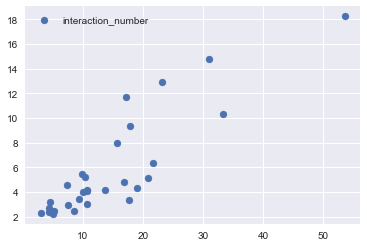

In [18]:
plt.scatter(x='hist_length', y='interaction_number', data=df_ss)
plt.legend()

### Testing the histogram

In [96]:
reduce(union_set, df_seq['interaction_hist'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [55]:
df_seq['weird'] = df_seq['interaction_hist'].apply(in_list, list_of_items = [9])

In [56]:
df_seq[df_seq.weird == 1]

,session_id,user_id,screen,interaction_hist,interaction_label,time,hist_length,weird
216,58921c8cc4b502ffff613efd,b3a9461bb34f461cd797d26028925e03,UIAlertController,"[0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 1, 3, 5, 3, 9, 1, 4, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0]","[trail, single_tap, trail, single_tap, trail, single_tap, trail, single_tap, trail, single_tap, trail, single_tap, trail, single_tap, trail, single_tap, trail, single_tap, trail, double_tap, single...",2017-02-01 17:40:02,42,1
617,589386dfc4b502ffff30151d,50abd41ce7ecdadc854a24df86848c0d,UIAlertController,"[0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 9, 2, 2, 0, 2, 0, 2, 0]","[trail, single_tap, trail, single_tap, trail, single_tap, trail, single_tap, trail, single_tap, trail, single_tap, trail, double_tap, single_tap, trail, single_tap, trail, double_tap, single_tap, t...",2017-02-02 19:26:37,33,1


In [59]:
df['interaction_information'][307]

[{'_screen': 'ViewController',
  'interaction_count': 3,
  'interaction_label': ['orientation_change_ios', 'trail', 'single_tap'],
  'interaction_time': array([ 1.17919999,  1.18154198,  1.29688299]),
  'start_time': 0,
  'view_time': 1.9882689714432},
 {'_screen': 'CreateWeddingViewController',
  'interaction_count': 18,
  'interaction_label': ['trail',
   'single_tap',
   'trail',
   'single_tap',
   'trail',
   'single_tap',
   'trail',
   'single_tap',
   'trail',
   'single_tap',
   'trail',
   'single_tap',
   'trail',
   'single_tap',
   'trail',
   'single_tap',
   'trail',
   'single_tap'],
  'interaction_time': array([  2.86038297,   2.94607598,   3.828758  ,   3.92657399,
           9.029257  ,   9.14609998,  11.56114   ,  11.67744398,
          12.24624199,  12.41231096,  21.014144  ,  21.11222196,
          29.93021297,  30.01342297,  33.49766397,  33.63095796,
          72.12091899,  72.21893901]),
  'start_time': 1.9882689714432,
  'view_time': 70.772791981697},
 {'_scre

In [65]:
x = df['interaction_information'][307][8]['interaction_time'] - 181.38246798515 

In [66]:
x

array([  4.052872  ,   4.22327697,   5.23598397,   5.37098897,
         7.48803902,   7.60282999,   8.42848897,   8.53835899,
         9.72028399,   9.78876501,  12.47059   ,  12.539159  ,
        15.49115598,  15.57039899,  16.98930097,  17.05459398,
        17.722498  ,  17.83775198,  18.17350501,  18.28755498,
        18.28759098,  18.62273902,  18.73771399,  19.173316  ,
        19.22249299,  19.873151  ,  20.089652  ,  20.3743    ,
        20.48925102,  20.62656999,  20.72155201,  20.82319498,
        20.89071298,  20.89074701,  20.99017298,  21.07111102,
        22.05642402,  22.17157602,  22.52331197,  22.60632098,
        24.34134501,  24.52212602,  25.72391802,  25.90685999,
        26.82407802,  26.95666701,  27.69048899,  27.92575699,
        28.74157   ,  38.75984401,  39.49561298,  39.62378901,
        40.22564101,  40.44160998])

In [67]:
hist = np.histogram(x, bins=range(0,43))[0]
hist

array([0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 1, 3, 5, 3, 9, 1, 4,
       0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0], dtype=int32)

# Main TEST

### Testing on all users, 4 different screens

**Choose 4 equal groups of screens from df_seq:**

In [57]:
number_row = 200
df_1 = df_seq[df_seq.screen == 'PhotoStreamViewController'].iloc[0:number_row,:]
df_2 = df_seq[df_seq.screen == 'UploadViewController'].iloc[0:number_row,:]
df_4 = df_seq[df_seq.screen == 'EventPageViewController'].iloc[0:number_row,:]
df_3 = df_seq[df_seq.screen == 'GuestsViewController'].iloc[0:number_row,:]
df_dtw = pd.concat([df_1, df_2, df_3, df_4])
len(df_dtw)

800

In [58]:
df_dtw

,session_id,user_id,time,screen,interaction_hist,interaction_label,interaction_coors_binned,hist_length,interaction_number
1,588f6d9cc4b502ffffb26f48,6c705f66cbf05fe658f46f286aea07f5,2017-01-30 16:47:13,PhotoStreamViewController,"[23, 10, 9, 0, 4, 5, 4, 3, 5, 2, 0, 0, 0, 4]","[3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0]","[40.0, 4.0, 15.0, 0.0, 21.0, 2.0, 0.0, 3.0, 2.0, 3.0, 20.0, 0.0, 0.0, 10.0]",14,69
6,588f6e26ff6059ffff8b4595,6c705f66cbf05fe658f46f286aea07f5,2017-01-30 16:49:31,PhotoStreamViewController,"[4, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2]","[2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0]","[4.0, 4.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",14,12
8,588f6fe0ff6059ffff8b4bca,6c705f66cbf05fe658f46f286aea07f5,2017-01-30 16:56:43,PhotoStreamViewController,"[37, 18, 19, 0, 0, 1, 14, 15, 7, 0, 0, 0, 0, 0]","[5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 32.0]","[65.0, 3.0, 14.0, 4.0, 44.0, 2.0, 0.0, 3.0, 2.0, 2.0, 29.0, 0.0, 2.0, 25.0]",14,111
11,588f735ec4b502ffff81e040,6c705f66cbf05fe658f46f286aea07f5,2017-01-30 17:14:30,PhotoStreamViewController,"[68, 42, 20, 0, 6, 20, 18, 11, 12, 1, 0, 0, 0, 6]","[14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 51.0]","[107.0, 11.0, 20.0, 19.0, 54.0, 9.0, 4.0, 8.0, 11.0, 2.0, 28.0, 2.0, 10.0, 30.0]",14,204
12,588f735ec4b502ffff81e040,6c705f66cbf05fe658f46f286aea07f5,2017-01-30 17:14:30,PhotoStreamViewController,"[4, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0]","[2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0]","[4.0, 4.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0]",14,12
19,588f75cbc4b502ffffa76deb,7fe57992e737e180ba852622c0857859,2017-01-30 17:24:34,PhotoStreamViewController,"[5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 1, 2, 2]","[2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0]","[5.0, 4.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",14,15
20,588f75cbc4b502ffffa76deb,7fe57992e737e180ba852622c0857859,2017-01-30 17:24:34,PhotoStreamViewController,"[4, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0]","[2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0]","[4.0, 4.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0]",14,12
29,588f7753ff6059ffff8b47ee,7fe57992e737e180ba852622c0857859,2017-01-30 17:32:40,PhotoStreamViewController,"[8, 0, 0, 2, 6, 0, 0, 0, 0, 0, 2, 1, 2, 3]","[3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0]","[11.0, 3.0, 3.0, 2.0, 3.0, 3.0, 0.0, 2.0, 0.0, 3.0, 0.0, 0.0, 3.0, 0.0]",14,24
30,588f7753ff6059ffff8b47ee,7fe57992e737e180ba852622c0857859,2017-01-30 17:32:40,PhotoStreamViewController,"[24, 20, 3, 0, 1, 16, 1, 3, 3, 0, 0, 0, 0, 1]","[5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0]","[36.0, 10.0, 8.0, 3.0, 12.0, 7.0, 3.0, 2.0, 0.0, 9.0, 6.0, 0.0, 5.0, 1.0]",14,72
36,588f78adc4b502ffffab9926,7fe57992e737e180ba852622c0857859,2017-01-30 17:34:15,PhotoStreamViewController,"[5, 3, 0, 2, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0]","[2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0]","[5.0, 0.0, 2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0]",14,15


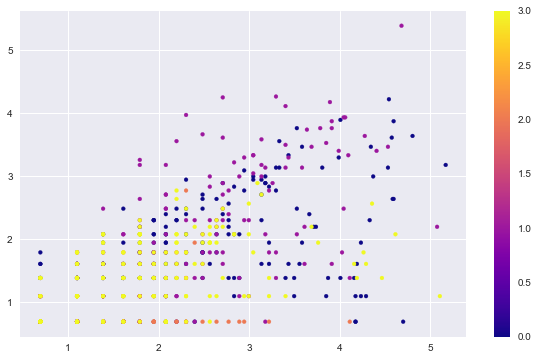

In [64]:
screen_label = 200 * [0] + 200 * [1] + 200 * [2] + 200 * [3]
screen_label = np.array(screen_label)
fig = plt.figure(figsize=[10,6])
plt.scatter(x=np.log(df_dtw.hist_length), y=np.log(df_dtw.interaction_number), cmap='plasma', c=screen_label, s=15)
plt.colorbar()

In [40]:
df_dtw.screen.value_counts()

UploadViewController         200
EventPageViewController      200
PhotoStreamViewController    200
GuestsViewController         200
Name: screen, dtype: int64

In [65]:
df_dtw['log_hist_length'] = np.log(df_dtw['hist_length'])
df_dtw['log_interaction_number'] = np.log(df_dtw['interaction_number'])

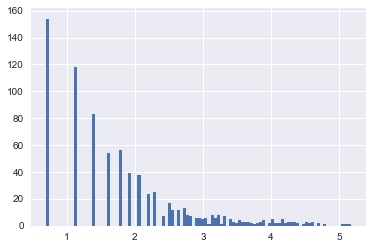

In [68]:
plt.hist(df_dtw.log_hist_length, bins=100)
plt.show()

In [70]:
array1 = df_1.loc[:,'interaction_hist_normalized'].tolist()
array2 = df_2.loc[:,'interaction_hist_normalized'].tolist()a
array3 = df_3.loc[:,'interaction_hist_normalized'].tolist()

In [71]:
distance_array1 = condensed_matrix(array1, 'dtw', normalization = 'short')
distance_array12 = cross_distance_matrix(array1, array2, 'dtw', normalization = 'short')
distance_array13 = cross_distance_matrix(array1, array3, 'dtw', normalization = 'short')
distance_array23 = cross_distance_matrix(array2, array3, 'dtw', normalization = 'short')
distance_array2 = condensed_matrix(array2, 'dtw', normalization = 'short')
distance_array3 = condensed_matrix(array3, 'dtw', normalization = 'short')

In [73]:
mean1, var1 = np.mean(distance_array1), np.var(distance_array1)
mean2, var2 = np.mean(distance_array2), np.var(distance_array2)
mean3, var3 = np.mean(distance_array3), np.var(distance_array3)
mean12, var12 = np.mean(distance_array12), np.var(distance_array12)
mean13, var13 = np.mean(distance_array13), np.var(distance_array13)
mean23, var23 = np.mean(distance_array23), np.var(distance_array23)

In [74]:
meandf = pd.DataFrame(index=['array1','array2','array3'], columns=['array1','array2','array3'])
meandf['array1'] = mean1, mean12, mean13
meandf['array2'] = mean12, mean2, mean23
meandf['array3'] = mean13, mean23, mean3

meandf

,array1,array2,array3
array1,0.264503,0.262672,1.243104
array2,0.262672,0.261931,0.819594
array3,1.243104,0.819594,0.793507


In [50]:
vardf = meandf.copy()
vardf['array1'] = var1, var12, var13
vardf['array2'] = var12, var2, var23
vardf['array3'] = var13, var23, var3

In [51]:
vardf

,array1,array2,array3
array1,4.698395,1.727598,14.369114
array2,1.727598,0.634675,5.323182
array3,14.369114,5.323182,3.256333


## DBSCAN AND CLUSTERING AGAIN

In [42]:
dist_mat_d = distance_matrix(df_dtw.loc[:,'interaction_hist'].tolist(), dist='dtw')

In [43]:
dist_mat_d.shape

(800, 800)

In [45]:
dist_mat_l = distance_matrix(df_dtw.loc[:,'interaction_label'].tolist(), dist='levenshtein')

In [46]:
w = 0.5
dist_mat_dl = w * dist_mat_d + (1-w) * dist_mat_l

In [66]:
db = DBSCAN(eps=0.9, min_samples=18, metric='precomputed')

res = db.fit_predict(dist_mat)

n_clusters_ = len(set(res)) - (1 if -1 in res else 0)
print('Number of clusters:', n_clusters_)
unique, counts = np.unique(res, return_counts=True)
print('Distribution:' + '\n',np.asarray((unique, counts)).T)
res

Number of clusters: 4
Distribution:
 [[ -1 488]
 [  0 107]
 [  1  30]
 [  2  68]
 [  3 107]]


array([-1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  3, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  3, -1, -1, -1,
       -1, -1, -1,  3, -1, -1, -1, -1, -1, -1,  3,  3, -1, -1, -1, -1, -1,
       -1, -1, -1,  0, -1, -1, -1,  0,  0, -1, -1,  1, -1, -1, -1,  3, -1,
        1, -1, -1,  0, -1, -1, -1, -1, -1,  2, -1, -1, -1,  3, -1, -1, -1,
       -1,  1,  3, -1,  3,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        2,  2, -1,  0, -1, -1, -1,  3, -1,  3, -1, -1, -1, -1,  0, -1,  2,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  3, -1, -1,
        2, -1, -1,  0,  3

### Testing on same user, 3 different screens

In [97]:
df_seq_user = df_seq[df_seq.user_id == '2fa622e84b1db23e959cbfea1a0111c4']

In [98]:
df_seq_user.screen.value_counts()

PhotoStreamViewController    42
PurchaseViewController       27
UIAlertController                   14
Name: screen, dtype: int64

In [99]:
num = 14
df_1 = df_seq_user[df_seq_user.screen == 'PhotoStreamViewController'].iloc[0:num,:]
df_2 = df_seq_user[df_seq_user.screen == 'UIAlertController'].iloc[0:num,:]
df_3 = df_seq_user[df_seq_user.screen == 'PurchaseViewController'].iloc[0:num,:]
df_dtw = pd.concat([df_1, df_2, df_3])

In [100]:
df_dtw.screen.value_counts()

UIAlertController                   14
PurchaseViewController       14
PhotoStreamViewController    14
Name: screen, dtype: int64

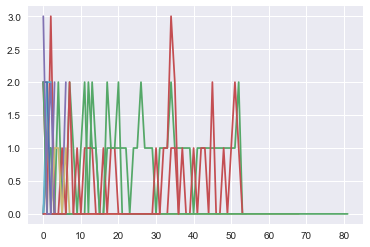

In [84]:
for row in df_1.interaction_hist:
    plt.plot(row)

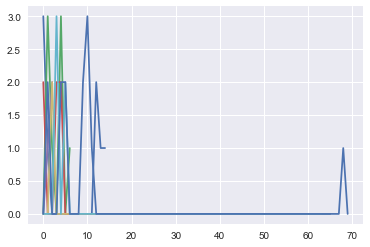

In [85]:
for row in df_2.interaction_hist:
    plt.plot(row)

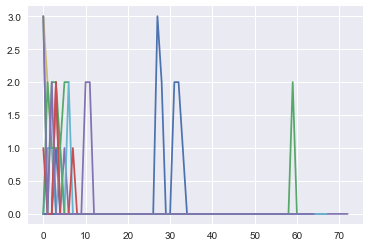

In [86]:
for row in df_3.interaction_hist:
    plt.plot(row)

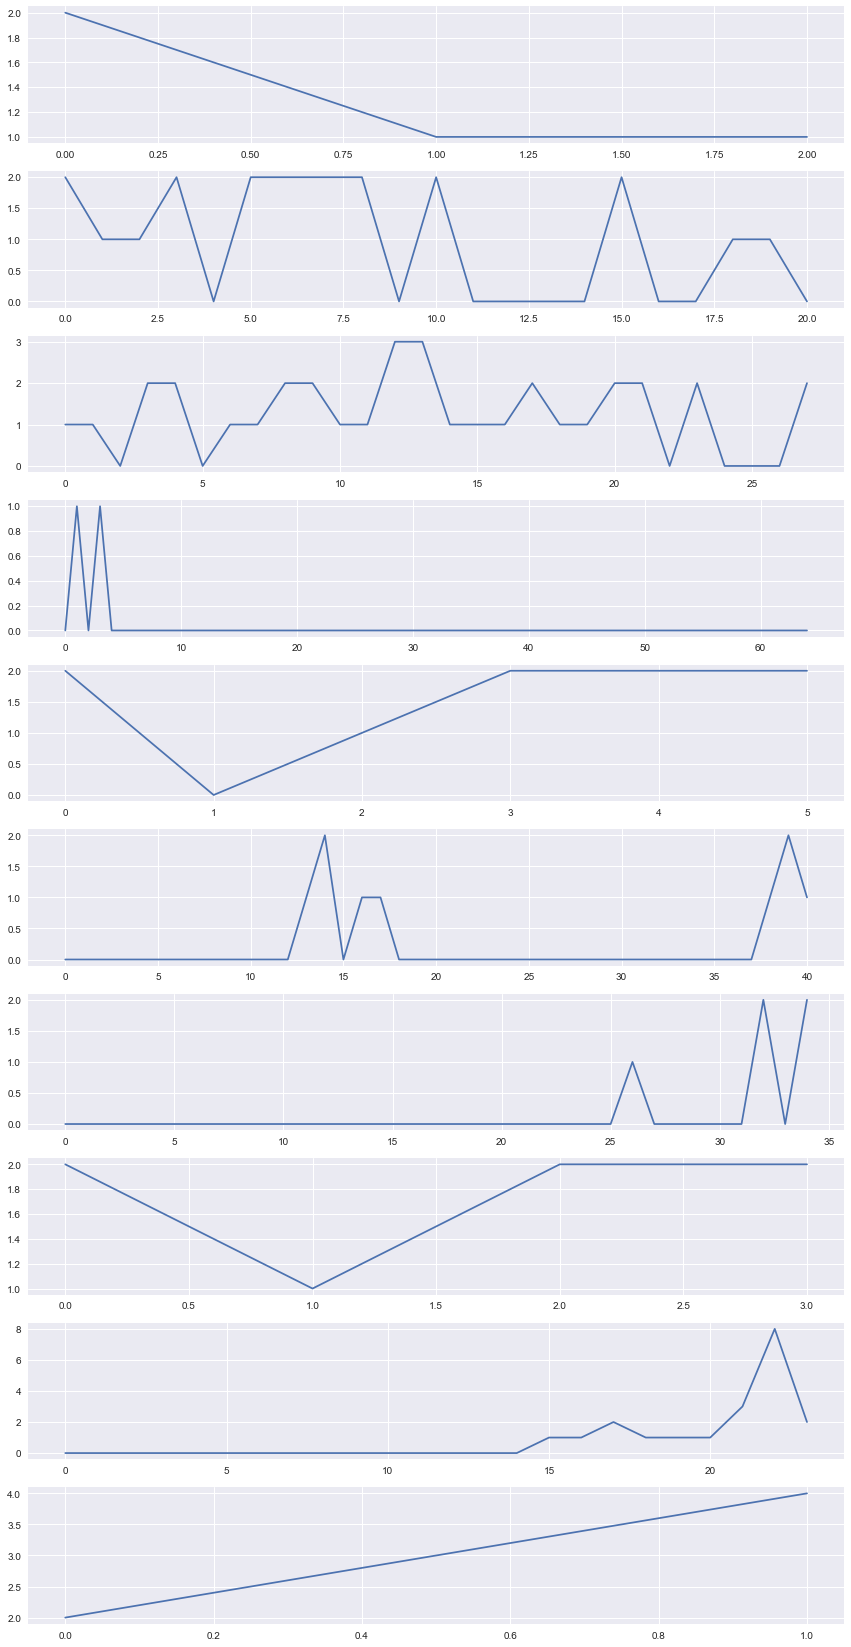

In [29]:
fig=plt.figure(figsize = [12, 23])
i = 1
for row in df_1.interaction_hist:
    ax = fig.add_subplot(10,1,i)
    ax.plot(row)
    i+=1
plt.tight_layout()

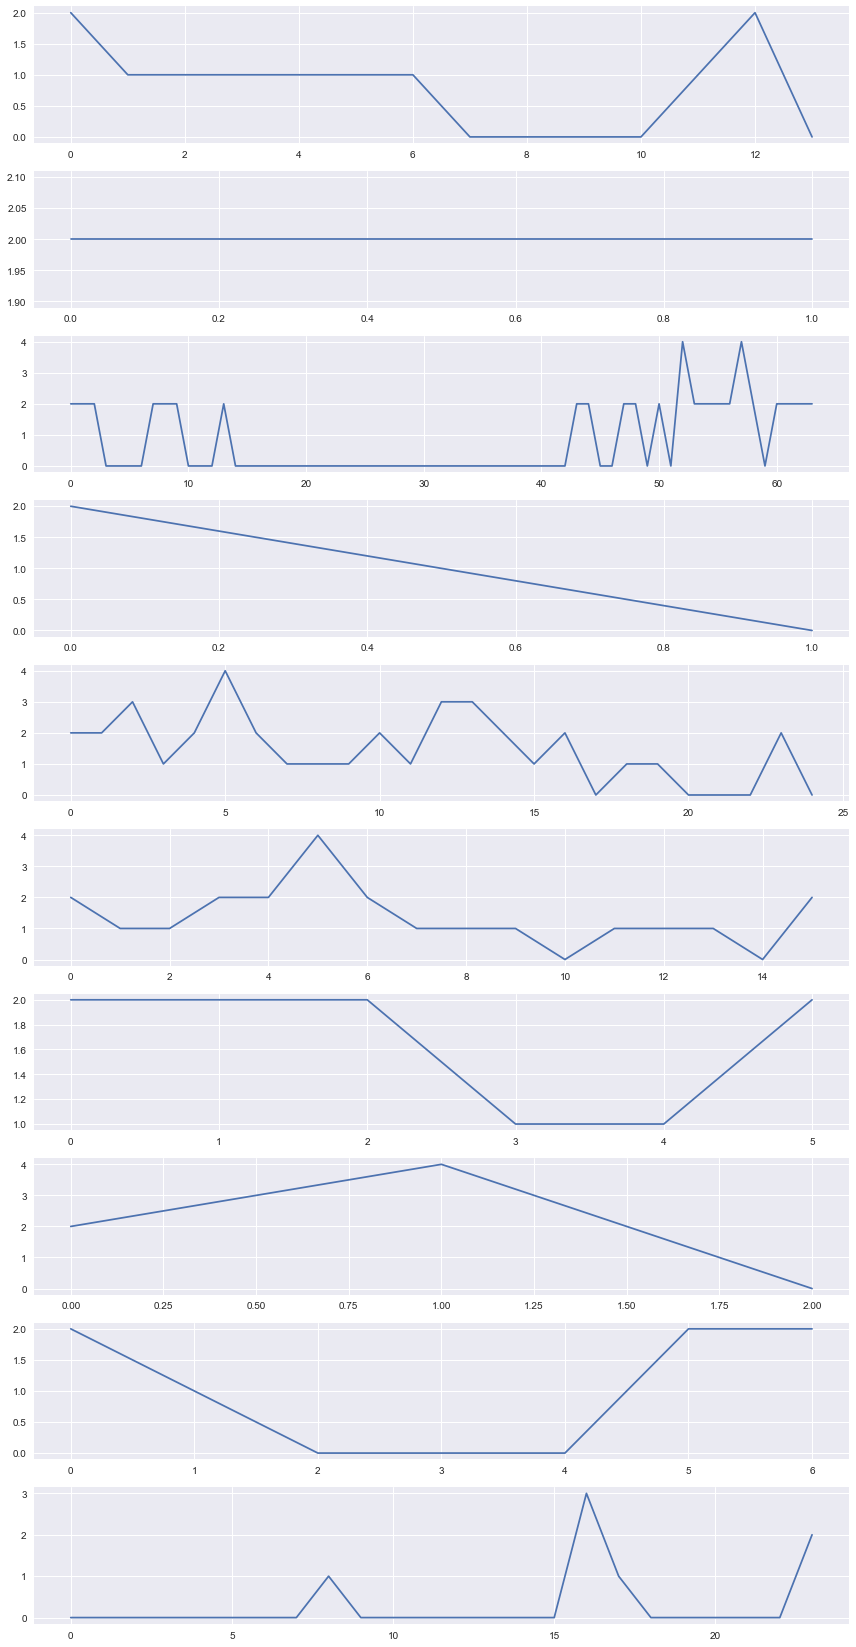

In [30]:
fig=plt.figure(figsize = [12, 23])
i = 1
for row in df_2.interaction_hist:
    ax = fig.add_subplot(10,1,i)
    ax.plot(row)
    i+=1
plt.tight_layout()

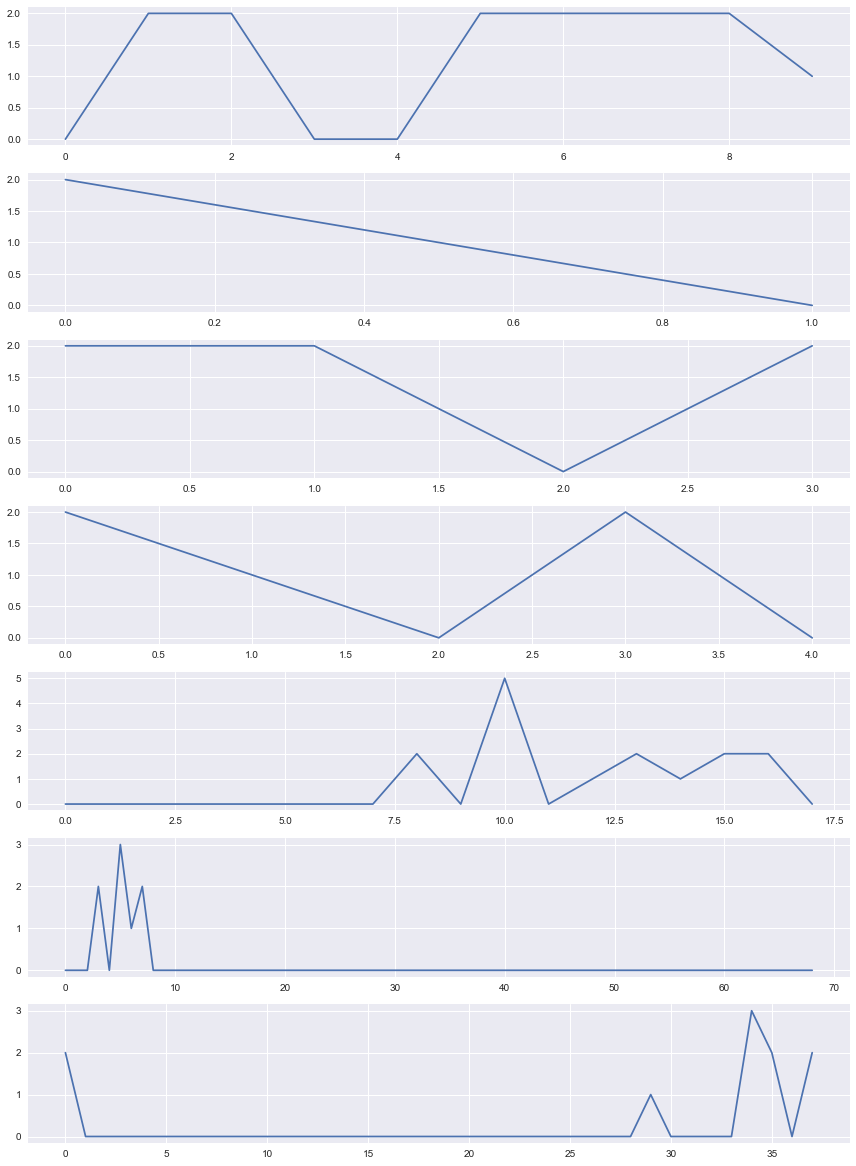

In [31]:
fig=plt.figure(figsize = [12, 23])
i = 1
for row in df_3.interaction_hist:
    ax = fig.add_subplot(10,1,i)
    ax.plot(row)
    i+=1
plt.tight_layout()

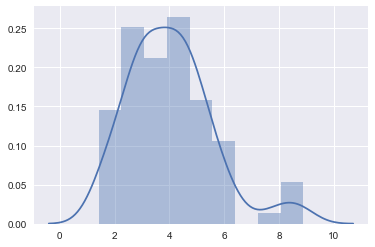

In [105]:
sns.distplot(distance_array1)

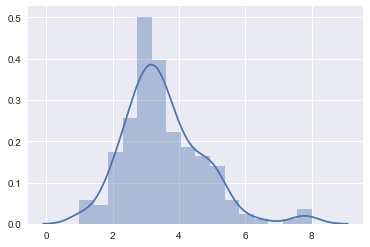

In [106]:
sns.distplot(distance_array12)

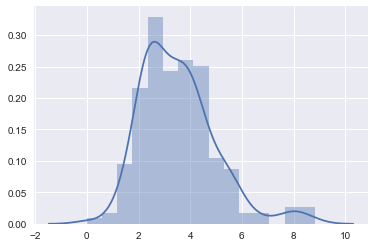

In [107]:
sns.distplot(distance_array13)

In [104]:
array1 = df_dtw[df_dtw.screen == 'PhotoStreamViewController'].loc[:,'interaction_hist'].tolist()
array2 = df_dtw[df_dtw.screen == 'UIAlertController'].loc[:,'interaction_hist'].tolist()
array3 = df_dtw[df_dtw.screen == 'PurchaseViewController'].loc[:,'interaction_hist'].tolist()

norm = 'none'
distance_array1 = condensed_matrix(array1, 'dtw', normalization=norm)
distance_array12 = cross_distance_matrix(array1, array2, 'dtw', normalization=norm)
distance_array13 = cross_distance_matrix(array1, array3, 'dtw', normalization=norm)
distance_array23 = cross_distance_matrix(array2, array3, 'dtw', normalization=norm)
distance_array2 = condensed_matrix(array2, 'dtw', normalization=norm)
distance_array3 = condensed_matrix(array3, 'dtw', normalization=norm)


mean1, var1 = np.mean(distance_array1), np.var(distance_array1)
mean2, var2 = np.mean(distance_array2), np.var(distance_array2)
mean3, var3 = np.mean(distance_array3), np.var(distance_array3)
mean12, var12 = np.mean(distance_array12), np.var(distance_array12)
mean13, var13 = np.mean(distance_array13), np.var(distance_array13)
mean23, var23 = np.mean(distance_array23), np.var(distance_array23)

meandf = pd.DataFrame(index=['array1','array2','array3'], columns=['array1','array2','array3'])

meandf['array1'] = mean1, mean12, mean13
meandf['array2'] = mean12, mean2, mean23
meandf['array3'] = mean13, mean23, mean3

meandf

,array1,array2,array3
array1,4.028427,3.535705,3.530903
array2,3.535705,2.973707,2.979974
array3,3.530903,2.979974,3.142035


### Testing on 4 different users, same screen

In [39]:
df_seq_screen = df_seq[df_seq.screen == 'PhotoStreamViewController']

In [40]:
df_seq_screen.user_id.value_counts().head(4)

8d32565a0b7d62fed8dc20ed5110a2e6    49
4ad164bfbeb505ba829f4e9bb8029410    23
0773c7413626e6d4a6f770b4df2e3a89    19
36fcbdabf4c2a746770857eee8a81767    16
Name: user_id, dtype: int64

In [41]:
df_1 = df_seq_screen[df_seq_screen.user_id == '8d32565a0b7d62fed8dc20ed5110a2e6'].iloc[0:15,:]
df_2 = df_seq_screen[df_seq_screen.user_id == '4ad164bfbeb505ba829f4e9bb8029410'].iloc[0:15,:]
df_3 = df_seq_screen[df_seq_screen.user_id == '0773c7413626e6d4a6f770b4df2e3a89'].iloc[0:15,:]
df_4 = df_seq_screen[df_seq_screen.user_id == 'bd3cc35fd98be0be79eb048e89175a5d'].iloc[0:15,:]
df_dtw = pd.concat([df_1, df_2, df_3, df_4])

In [42]:
df_dtw.user_id.value_counts()

4ad164bfbeb505ba829f4e9bb8029410    15
8d32565a0b7d62fed8dc20ed5110a2e6    15
0773c7413626e6d4a6f770b4df2e3a89    15
bd3cc35fd98be0be79eb048e89175a5d    13
Name: user_id, dtype: int64

In [43]:
array4 = df_dtw[df_dtw.user_id == '8d32565a0b7d62fed8dc20ed5110a2e6'].loc[:,'interaction_hist'].tolist()
array2 = df_dtw[df_dtw.user_id == '4ad164bfbeb505ba829f4e9bb8029410'].loc[:,'interaction_hist'].tolist()
array1 = df_dtw[df_dtw.user_id == '0773c7413626e6d4a6f770b4df2e3a89'].loc[:,'interaction_hist'].tolist()
array3 = df_dtw[df_dtw.user_id == 'bd3cc35fd98be0be79eb048e89175a5d'].loc[:,'interaction_hist'].tolist()


distance_array1 = condensed_matrix(array1)
distance_array12 = cross_distance_matrix(array1, array2)
distance_array13 = cross_distance_matrix(array1, array3)
distance_array14 = cross_distance_matrix(array1, array4)
distance_array23 = cross_distance_matrix(array2, array3)
distance_array24 = cross_distance_matrix(array2, array4)
distance_array34 = cross_distance_matrix(array3, array4)
distance_array2 = condensed_matrix(array2)
distance_array3 = condensed_matrix(array3)
distance_array4 = condensed_matrix(array4)


mean1, var1 = np.mean(distance_array1), np.var(distance_array1)
mean2, var2 = np.mean(distance_array2), np.var(distance_array2)
mean3, var3 = np.mean(distance_array3), np.var(distance_array3)
mean4, var4 = np.mean(distance_array4), np.var(distance_array4)
mean12, var12 = np.mean(distance_array12), np.var(distance_array12)
mean13, var13 = np.mean(distance_array13), np.var(distance_array13)
mean14, var14 = np.mean(distance_array14), np.var(distance_array14)
mean23, var23 = np.mean(distance_array23), np.var(distance_array23)
mean24, var24 = np.mean(distance_array24), np.var(distance_array24)
mean34, var34 = np.mean(distance_array34), np.var(distance_array34)

meandf = pd.DataFrame(index=['array1','array2','array3','array4'], columns=['array1','array2','array3','array4'])

meandf['array1'] = mean1, mean12, mean13, mean14
meandf['array2'] = mean12, mean2, mean23, mean24
meandf['array3'] = mean13, mean23, mean3, mean34
meandf['array4'] = mean14, mean24, mean34, mean4

meandf

,array1,array2,array3,array4
array1,2.681433,4.078305,2.673355,3.156812
array2,4.078305,5.748743,4.159788,4.223504
array3,2.673355,4.159788,2.328343,2.971176
array4,3.156812,4.223504,2.971176,3.339120


--

# Levenshtein Distance

In [45]:
levenshtein('AAA','BBBBBBB',sub_cost=2,print_mat=True, normalization='long')

[[  0.   1.   2.   3.   4.   5.   6.   7.]
 [  1.   2.   3.   4.   5.   6.   7.   8.]
 [  2.   3.   4.   5.   6.   7.   8.   9.]
 [  3.   4.   5.   6.   7.   8.   9.  10.]]


3.7796447300922722

In [46]:
levenshtein('BBB','BBBBBBB',sub_cost=2,print_mat=True, normalization='long')

[[ 0.  1.  2.  3.  4.  5.  6.  7.]
 [ 1.  0.  1.  2.  3.  4.  5.  6.]
 [ 2.  1.  0.  1.  2.  3.  4.  5.]
 [ 3.  2.  1.  0.  1.  2.  3.  4.]]


1.5118578920369088

In [47]:
levenshtein('AAA','BBB',sub_cost=2,print_mat=True, normalization='long')

[[ 0.  1.  2.  3.]
 [ 1.  2.  3.  4.]
 [ 2.  3.  4.  5.]
 [ 3.  4.  5.  6.]]


3.4641016151377548

In [68]:
levenshtein('BBB','BBBBBBBBBBBBBBBBB',sub_cost=2,print_mat=True, normalization='long')

[[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
   14.  15.  16.  17.]
 [  1.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.
   13.  14.  15.  16.]
 [  2.   1.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.
   12.  13.  14.  15.]
 [  3.   2.   1.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.
   11.  12.  13.  14.]]


3.3954987505086618

In [48]:
levenshtein('AAAAAAA','BBBBBBB',sub_cost=2,print_mat=True, normalization='long')

[[  0.   1.   2.   3.   4.   5.   6.   7.]
 [  1.   2.   3.   4.   5.   6.   7.   8.]
 [  2.   3.   4.   5.   6.   7.   8.   9.]
 [  3.   4.   5.   6.   7.   8.   9.  10.]
 [  4.   5.   6.   7.   8.   9.  10.  11.]
 [  5.   6.   7.   8.   9.  10.  11.  12.]
 [  6.   7.   8.   9.  10.  11.  12.  13.]
 [  7.   8.   9.  10.  11.  12.  13.  14.]]


5.2915026221291805

In [69]:
levenshtein('BBB','ABABABABABAB',sub_cost=2,print_mat=True, normalization='long')

[[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.]
 [  1.   2.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.]
 [  2.   3.   2.   3.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  3.   4.   3.   4.   3.   4.   3.   4.   5.   6.   7.   8.   9.]]


2.598076211353316

In [109]:
# Using same dataset as DTW, same user, 3 different screens
array1 = df_dtw[df_dtw.screen == 'PhotoStreamViewController'].loc[:,'interaction_label'].tolist()
array2 = df_dtw[df_dtw.screen == 'UIAlertController'].loc[:,'interaction_label'].tolist()
array3 = df_dtw[df_dtw.screen == 'PurchaseViewController'].loc[:,'interaction_label'].tolist()

norm = 'none'
distance_array1 = condensed_matrix(array1, 'levenshtein', normalization=norm)
distance_array12 = cross_distance_matrix(array1, array2, 'levenshtein', normalization=norm)
distance_array13 = cross_distance_matrix(array1, array3, 'levenshtein', normalization=norm)
distance_array23 = cross_distance_matrix(array2, array3, 'levenshtein', normalization=norm)
distance_array2 = condensed_matrix(array2, 'levenshtein', normalization=norm)
distance_array3 = condensed_matrix(array3, 'levenshtein', normalization=norm)


mean1, var1 = np.mean(distance_array1), np.var(distance_array1)
mean2, var2 = np.mean(distance_array2), np.var(distance_array2)
mean3, var3 = np.mean(distance_array3), np.var(distance_array3)
mean12, var12 = np.mean(distance_array12), np.var(distance_array12)
mean13, var13 = np.mean(distance_array13), np.var(distance_array13)
mean23, var23 = np.mean(distance_array23), np.var(distance_array23)

meandf = pd.DataFrame(index=['array1','array2','array3'], columns=['array1','array2','array3'])

meandf['array1'] = mean1, mean12, mean13
meandf['array2'] = mean12, mean2, mean23
meandf['array3'] = mean13, mean23, mean3

meandf

,array1,array2,array3
array1,14.351648,10.418367,10.887755
array2,10.418367,6.307692,6.653061
array3,10.887755,6.653061,6.560440


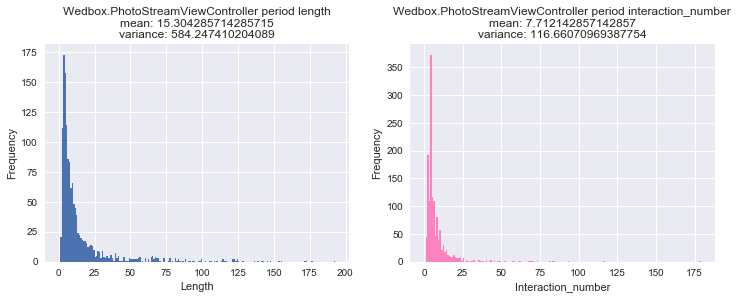

In [85]:
plot_screen_period(df_seq, 'PhotoStreamViewController')

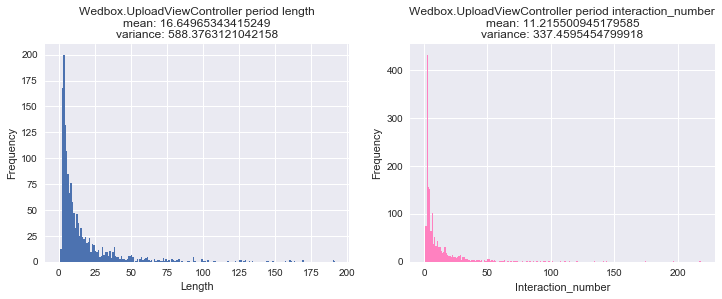

In [54]:
plot_screen_period(df_seq, 'UploadViewController')

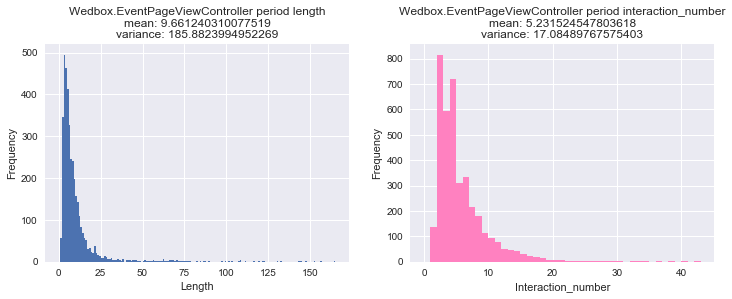

In [58]:
plot_screen_period(df_seq, 'EventPageViewController') 

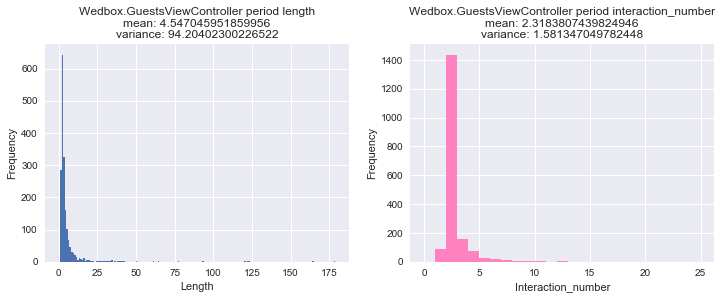

In [56]:
plot_screen_period(df_seq, 'GuestsViewController')

### Trail-tap

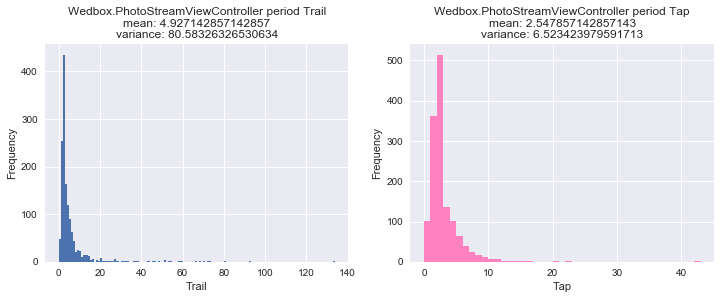

In [89]:
plot_screen_period(df_seq, 'PhotoStreamViewController', 'trail-tap')

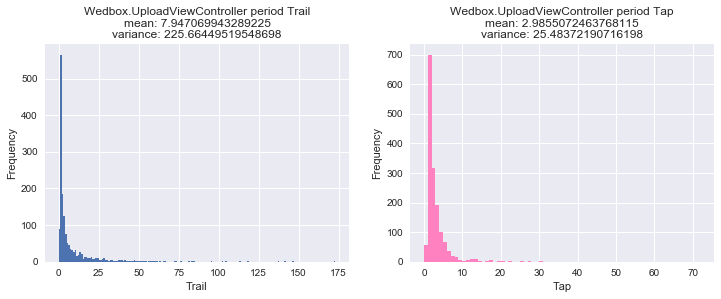

In [91]:
plot_screen_period(df_seq, 'UploadViewController', 'trail-tap')

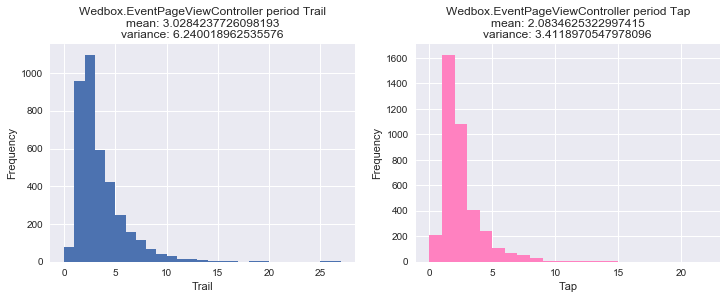

In [114]:
plot_screen_period(df_seq, 'EventPageViewController', 'trail-tap')

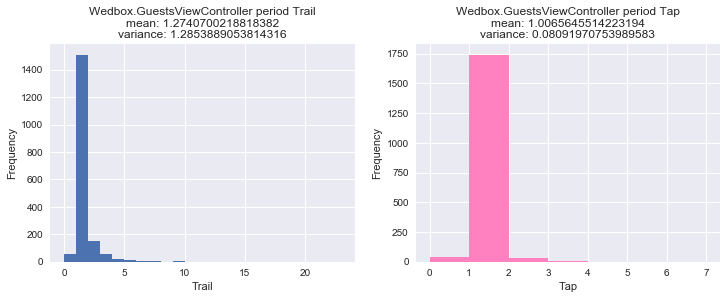

In [113]:
plot_screen_period(df_seq, 'GuestsViewController', 'trail-tap')

### Ratio

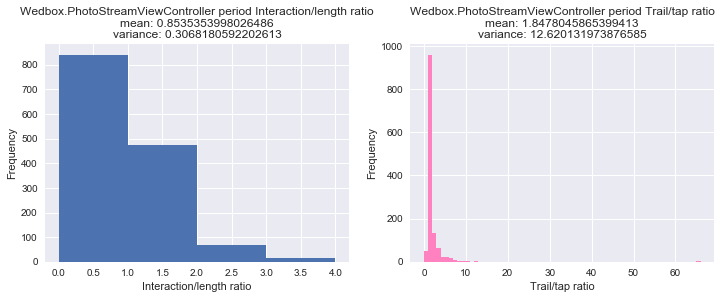

In [112]:
plot_screen_period(df_seq, 'PhotoStreamViewController', 'ratio')

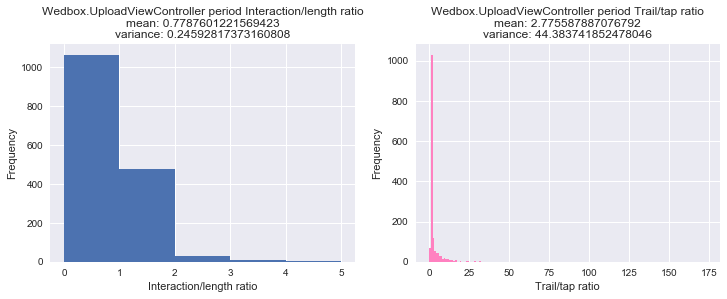

In [115]:
plot_screen_period(df_seq, 'UploadViewController', 'ratio')

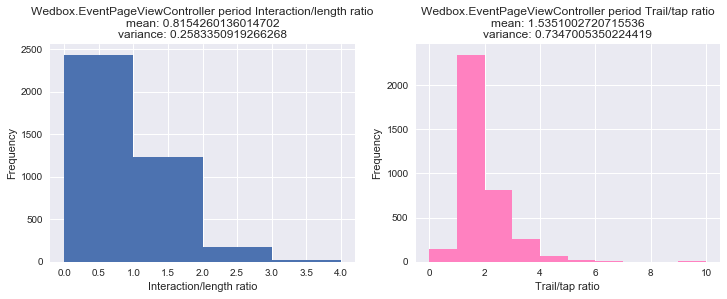

In [116]:
plot_screen_period(df_seq, 'EventPageViewController', 'ratio')

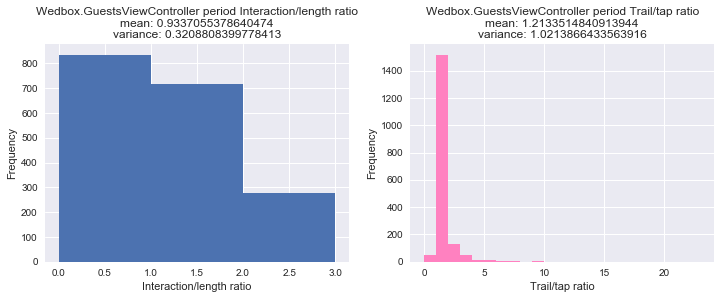

In [117]:
plot_screen_period(df_seq, 'GuestsViewController', 'ratio')